# Análise dos casos de óbito de Covid-19 em Indaiatuba

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from scipy.stats import norm

# 1. Extração dos dados 
Fonte: G1 - Campinas

https://g1.globo.com/sp/campinas-regiao/noticia/2020/06/28/coronavirus-prefeituras-da-regiao-de-campinas-confirmam-novos-casos-neste-domingo-28-de-junho.ghtml

In [2]:
base = pd.read_excel("CovidIndaiatuba.xlsx")

In [3]:
base.tail()

,Obitos,Data,Sexo,Idade,anos,Comorbidade
55,56,2020-06-24,Homem,54,"anos,","Sem Comorbidade, ex-tabagista."
56,57,2020-06-24,Homem,65,"anos,",Com Comorbidades
57,58,2020-06-25,Homem,59,"anos,",Sem Comorbidade
58,59,2020-06-26,Homem,53,"anos,",Com Comorbidades
59,60,2020-06-27,Homem,74,"anos,",Com Comorbidades


# 2. Criação das colunas: MesMorte, diferençaDias e MédiaMovel - concatenação 

In [4]:
base.groupby(base['Data'].dt.month)['Obitos'].sum()
base['MesMorte'] = base['Data'].dt.month
base['diferencaDias'] = base['Data'] - base['Data'].min()
base['MédiaMovel'] = base['Obitos'].rolling(2).mean()
base

,Obitos,Data,Sexo,Idade,anos,Comorbidade,MesMorte,diferencaDias,MédiaMovel
0,1,2020-03-31,Homem,64,"anos,",Com Comorbidades,3,0 days,NaN
1,2,2020-04-13,Mulher,50,"anos,",Com Comorbidades,4,13 days,1.5
2,3,2020-04-18,Mulher,52,"anos,",Sem Comorbidade,4,18 days,2.5
3,4,2020-04-21,Homem,64,"anos,",Com Comorbidades,4,21 days,3.5
4,5,2020-04-24,Mulher,61,"anos,",Com Comorbidades,4,24 days,4.5
5,6,2020-05-02,Mulher,83,"anos,",Com Comorbidades,5,32 days,5.5
6,7,2020-05-06,Homem,38,"anos,",Com Comorbidades,5,36 days,6.5
7,8,2020-05-06,Homem,76,"anos,",Com Comorbidades,5,36 days,7.5
8,9,2020-05-07,Homem,30,"anos,",Com Comorbidades,5,37 days,8.5
9,10,2020-05-07,Homem,55,"anos,","Sem Comorbidade, ex-tabagista.",5,37 days,9.5


# 3. Cálculo por Sexo

In [5]:
pd.crosstab(base['Sexo'],base['Sexo'])

Sexo,Homem,Mulher
Sexo,,
Homem,37,0
Mulher,0,23


In [6]:
print ('Sexo em %')
Afetados = base['Sexo'].value_counts(normalize=True)
print (str(round(Afetados, 4) *100)) 

Sexo em %
Homem     61.67
Mulher    38.33
Name: Sexo, dtype: float64


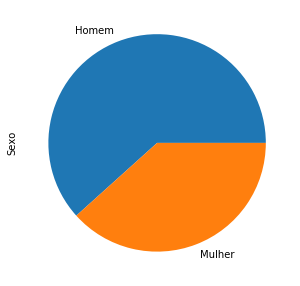

In [7]:
base['Sexo'].value_counts().plot(kind = "pie", figsize = (5,5))

# 4. Agrupando os dados pelo mês do óbito

In [8]:
df = base.groupby(base['Data'].dt.month)['Obitos'].count()
df

Data
3     1
4     4
5    22
6    33
Name: Obitos, dtype: int64

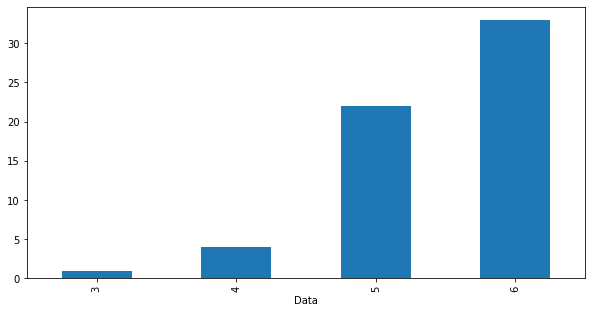

In [9]:
df.plot(kind = "bar", figsize = (10,5))

# 5. Calculando o total de dias desde a primeira morte

In [10]:
a = base['diferencaDias'] = base['Data'] - base['Data'].min()
a.tail()

55   85 days
56   85 days
57   86 days
58   87 days
59   88 days
Name: Data, dtype: timedelta64[ns]

# 6. Verifando se com coborbidades ou sem comorbidades

In [11]:
pd.crosstab(base['Comorbidade'],base['Comorbidade'])

Comorbidade,Com Comorbidades,Sem Comorbidade,"Sem Comorbidade, ex-tabagista."
Comorbidade,,,
Com Comorbidades,45,0,0
Sem Comorbidade,0,13,0
"Sem Comorbidade, ex-tabagista.",0,0,2


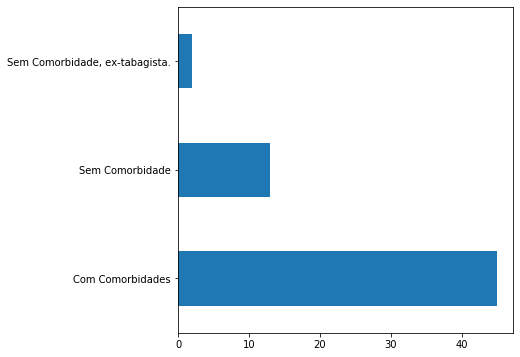

In [12]:
base['Comorbidade'].value_counts().head().plot(kind = "barh", figsize = (6,6))

# 7. Gráfico com exibição dos Óbitos no tempo

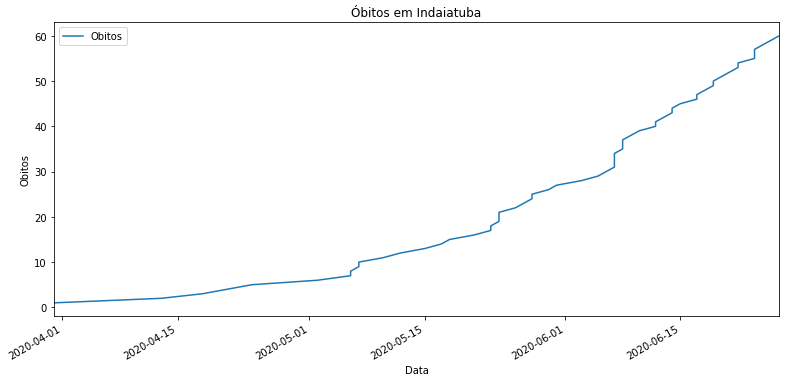

In [13]:
base.plot(x='Data', y='Obitos', figsize=(13,6));
plt.title('Óbitos em Indaiatuba')
plt.ylabel('Obitos')
plt.xlabel('Data')
plt.show()

# 8. Média de idades dos óbitos


In [14]:
base['Idade'].mean()

65.08333333333333

# 9 .Desvio Padrão de idades dos óbitos

In [15]:
base['Idade'].std()

14.397847846079985

# 10. Mediana de idades dos óbitos

In [16]:
base['Idade'].median()

66.5

# 11. Frequencia de idades dos óbitos

In [17]:
base['Idade'].mode()

0    67
1    86
dtype: int64

# 12. Gráfico com a Frequencia de idade dos óbitos

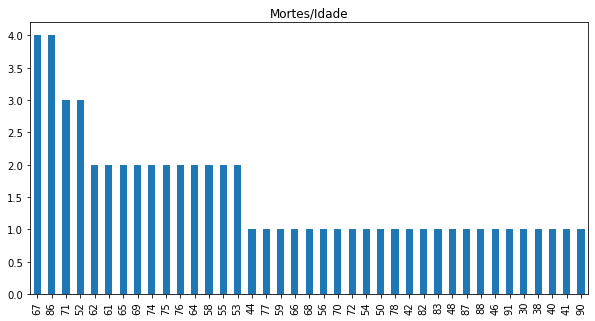

In [18]:
base['Idade'].value_counts().plot(kind='bar',figsize = (10,5), title='Mortes/Idade')

# 13. Caculando log para cálculo para simulação

In [19]:
log_obitos = np.log(1 + base['Obitos'].pct_change())

In [20]:
base['Obitos'].tail()

55    56
56    57
57    58
58    59
59    60
Name: Obitos, dtype: int64

# 14. Gráfico com log para cálculo da simulção

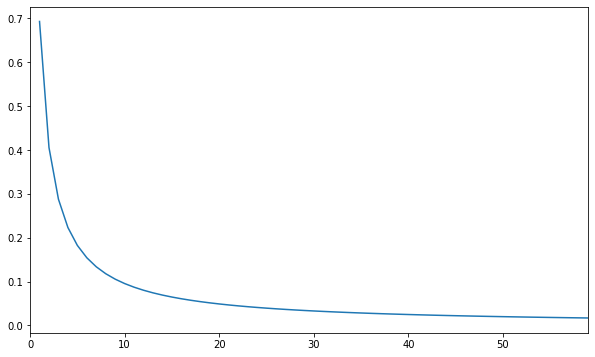

In [21]:
log_obitos.plot(figsize=(10,6))

In [22]:
u = log_obitos.mean()
u

0.06939567054613728

In [23]:
var = log_obitos.var()
var

0.011661945842254466

In [24]:
drift = u - (0.5 * var)
drift

0.06356469762501005

In [25]:
stdev = log_obitos.std()
stdev

0.10799048959169721

In [26]:
type(drift)

float

In [27]:
type(stdev)

float

In [28]:
np.array(drift)

array(0.0635647)

In [29]:
drift

0.06356469762501005

In [30]:
stdev

0.10799048959169721

In [31]:
norm.ppf(0.95)

1.6448536269514722

In [32]:
x = np.random.rand(10,2)
x

array([[0.98989504, 0.94508473],
       [0.87346674, 0.25509575],
       [0.01951348, 0.66902115],
       [0.60763922, 0.26189717],
       [0.17470253, 0.6794326 ],
       [0.92026637, 0.55810521],
       [0.05658742, 0.57492767],
       [0.74330935, 0.97473563],
       [0.33437776, 0.01786223],
       [0.43012154, 0.0590192 ]])

In [33]:
norm.ppf(x)

array([[ 2.32242779,  1.59895528],
       [ 1.14293272, -0.65853954],
       [-2.06390254,  0.43721188],
       [ 0.27317128, -0.63750749],
       [-0.93574389,  0.46611276],
       [ 1.40686557,  0.14616696],
       [-1.58408301,  0.18893386],
       [ 0.65358176,  1.95546053],
       [-0.4278566 , -2.10004975],
       [-0.17606475, -1.56306035]])

In [34]:
z= norm.ppf(np.random.rand(10,4))
z

array([[ 0.85849885,  0.55204135, -0.50432473, -0.04642231],
       [-0.10430731,  2.05797553,  0.29621856,  0.39688233],
       [ 0.32702683, -1.68800369,  0.33015478, -0.95820978],
       [-0.90932773,  0.22731684,  0.51254852,  0.25782036],
       [-0.2418919 ,  0.62453851,  0.24783136, -0.41220034],
       [ 0.16886352,  1.15024217, -0.92038686, -1.56675143],
       [-0.59488058, -0.2547554 ,  0.41077445, -0.26676343],
       [-0.95884686,  0.33461022,  1.43502671, -1.26476823],
       [ 0.63533758, -0.26477408,  0.67364128,  0.09662826],
       [ 0.31623609, -1.0881468 , -2.07192003, -0.01811269]])

In [35]:
t_intervals = 30
iterations = 10

In [36]:
daily_obitos = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_obitos

array([[0.83030033, 1.11851434, 1.09339445, 0.78691578, 0.92634946,
        1.08620772, 0.95300866, 1.16164065, 0.960198  , 1.15926193],
       [0.93852469, 0.90788823, 1.00342608, 1.04864313, 1.0010668 ,
        1.09119616, 1.02223515, 1.08829003, 1.18888694, 1.20521948],
       [1.09690598, 1.18557548, 1.01197487, 1.09108137, 1.11672635,
        1.07115455, 1.00973716, 1.1488649 , 1.16515476, 0.99176455],
       [1.1427163 , 1.20155092, 0.91075777, 1.03137942, 1.13799818,
        1.10731902, 1.11561238, 0.97933326, 1.18621528, 1.06741425],
       [1.08541168, 1.0872245 , 1.08359836, 1.08877452, 1.21261224,
        1.16087071, 1.25732441, 0.98778126, 1.06713572, 1.22730468],
       [1.16061892, 1.10524147, 0.93291805, 1.10239711, 1.04306613,
        1.1250267 , 1.04152315, 0.93914171, 1.07809881, 1.05402553],
       [1.20281881, 1.16010693, 1.27465416, 1.03570318, 1.09152973,
        1.11382774, 1.01229828, 1.0747088 , 0.91333428, 0.97897123],
       [1.1125814 , 1.09110414, 1.2369025

In [37]:
last_data = base['Obitos'].iloc[-1]
last_data

60

In [38]:
obito_list = np.zeros_like(daily_obitos)
obito_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [39]:
obito_list[0] = last_data
obito_list

array([[60., 60., 60., 60., 60., 60., 60., 60., 60., 60.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [40]:
for t in range (1, t_intervals):
    obito_list[t] = obito_list[t-1]* daily_obitos[t]

In [41]:
obito_list

array([[ 60.        ,  60.        ,  60.        ,  60.        ,
         60.        ,  60.        ,  60.        ,  60.        ,
         60.        ,  60.        ],
       [ 56.31148145,  54.47329385,  60.20556471,  62.91858776,
         60.06400793,  65.47176933,  61.33410907,  65.29740194,
         71.3332164 ,  72.31316862],
       [ 61.76840103,  64.58220142,  60.92651864,  68.64929865,
         67.07506008,  70.13038355,  61.93132882,  75.01789344,
         83.11423694,  71.71763737],
       [ 70.58375865,  77.59880367,  55.4893001 ,  70.80347398,
         76.33129657,  77.65670758,  69.09135744,  73.46751851,
         98.59137752,  76.55242821],
       [ 76.61243612,  84.36732018,  60.12811435,  77.08901849,
         92.56026486,  90.14939744,  86.87024994,  72.5698378 ,
        105.2103806 ,  93.95315344],
       [ 88.91784257,  93.24626111,  56.09460335,  84.98271145,
         96.54647717, 101.42047871,  90.4773763 ,  68.15336152,
        113.4271864 ,  99.02902242],
       [10

In [42]:
obito_list.min()

54.473293850534425

In [43]:
obito_list.max()

744.6074988074362

In [44]:
obito_list.mean()

206.61462930730477

In [45]:
obito_list.std()

138.85453482862988

In [46]:
np.median(obito_list)

162.08733920742486

# 15. Simulação de Monte Carlo para os óbitos em Indaiatuba

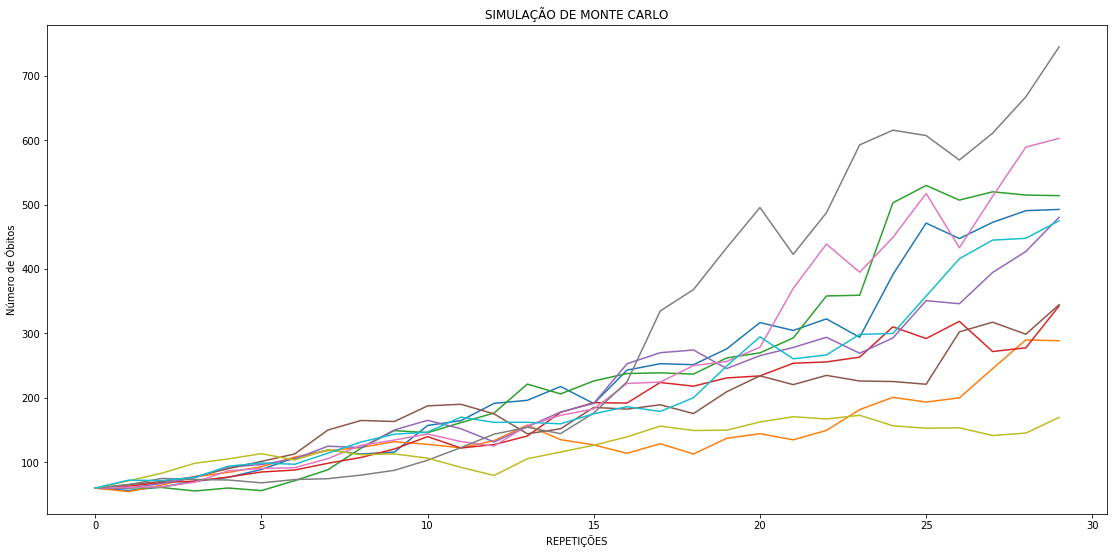

In [47]:
plt.figure(figsize=(19,9))
plt.plot(obito_list);
plt.title('SIMULAÇÃO DE MONTE CARLO');
plt.xlabel('REPETIÇÕES'); #definindo nome do eixo X
plt.ylabel('Número de Óbitos'); #definindo nome do eixo Y


In [48]:
print(f'Óbitos mínimos, {obito_list.min():.0f}'' pessoas')
print(f'Óbitos mediana, {np.median(obito_list):.0f}'' pessoas')
print(f'Óbitos médio, {obito_list.mean():.0f}'' pessoas')
print(f'Óbitos máximo, {obito_list.max():.0f}'' pessoas')
print('Óbitos atual,',(str(round(base['Obitos'].iloc[-1]))),'pessoas') #informar o ticker

Óbitos mínimos, 54 pessoas
Óbitos mediana, 162 pessoas
Óbitos médio, 207 pessoas
Óbitos máximo, 745 pessoas
Óbitos atual, 60 pessoas


# 16. Cálculo de mortes por dia

In [49]:
diferencaDias = base['diferencaDias'] = base['Data'] - base['Data'].min()
diferencaDias.tail()

55   85 days
56   85 days
57   86 days
58   87 days
59   88 days
Name: Data, dtype: timedelta64[ns]

In [50]:
last_data

60

In [51]:
diasCorridos = a.loc[59:].astype('timedelta64[D]') #atualizar com índice da última data = last_data

In [52]:
diasCorridos

59    88.0
Name: Data, dtype: float64

In [53]:
ObitosDia = last_data/diasCorridos
ObitosDia

59    0.681818
Name: Data, dtype: float64

# Principais Conclusões

1 A cada dois dias uma pessoa vem a óbito

2 Predominância do sexo masculino

3 O viés é ascendente